<h1 align="center"><B>Datahut QA Assignment</B></h1>

**Problem Statement:**

  The provided dataset contains inconsistencies, errors, missing values, and duplicates, making it unsuitable for analysis in its current state.
  
  My task is to systematically clean and preprocess this dataset to ensure its accuracy, completeness, and reliability.


**Objective:**

  The aim of this assignment is to systematically clean and preprocess the given messy dataset to ensure its suitability for further analysis.

  This involves identifying and rectifying inconsistencies,
  handling missing values, removing duplicates, correcting errors, and standardizing data formats.
  
  By the end of this task, the dataset will be transformed into a clean, reliable, and structured format, ready for accurate and meaningful analysis.

In [1]:
#Import Necessary Libraries
import pandas as pd
from matplotlib import pyplot as plt
import re
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

1) LOADING DATA

In [2]:
#Load dataset

df=pd.read_csv("/content/messy_data (1).csv")
# Top 5 records
df.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [3]:
# Last 5 records
df.tail()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support
10999,7107,fc25a38a-5747-46eb-b6d3-7173f8255809,Caroline Ochoa,53.0,cdavis@hodges.com,2023-08-10,149224.000000,Support


2) INSPECTING THE DATA

In [4]:
#Shape of our dataset

df.shape

(11000, 8)

In [5]:
#Column names

df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Email', 'Join Date', 'Salary',
       'Department'],
      dtype='object')

In [6]:
#Dropping unnecessary columns ,here 'Unnamed: 0' since it doesnot have any meaning here

df=df.drop(columns='Unnamed: 0',axis=1)

In [7]:
#Rename column name Join Date to Join_Date and ID to Id

df.rename(columns={'Join Date': 'Join_Date','ID':'Id'}, inplace=True)

In [8]:
#Structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          11000 non-null  object 
 1   Name        8667 non-null   object 
 2   Age         9253 non-null   float64
 3   Email       9731 non-null   object 
 4   Join_Date   8808 non-null   object 
 5   Salary      8761 non-null   float64
 6   Department  8745 non-null   object 
dtypes: float64(2), object(5)
memory usage: 601.7+ KB


There are 11000 rows and 7 columns.

There are Nan values in all columns except Id.



In [9]:
#Statistical Summary of the numerical data
df.describe()

,Age,Salary
count,9253.000000,8761.000000
mean,54.162650,89886.585012
std,21.072919,34896.320117
min,18.000000,24655.136613
25%,36.000000,59723.844874
50%,54.000000,89241.000000
75%,72.000000,119491.000000
max,90.000000,176156.206747


In [10]:
# Description of Categorical columns

df.describe(include="object")

,Id,Name,Email,Join_Date,Department
count,11000,8667,9731,8808,8745
unique,10000,7929,9160,3338,264
top,0413800c-975f-4107-908c-f9f733496b3c,Elizabeth Williams,fwilliams@yahoo.com,2022-03-31,Support
freq,2,6,3,12,1425


There are duplicated Id's.

Elizabeth Williams is the most frequent name in Name column.

2022-03-31 is the most common joining date in Join_Date.

Support is the most frequent value in Department column.

HANDLING NULL VALUES

In [11]:
#Checking for null values
df.isna().sum()

,0
Id,0
Name,2333
Age,1747
Email,1269
Join_Date,2192
Salary,2239
Department,2255


There are Nan values in all columns except Id.

Nan values should be handled properly,otherwise it may affect our data analysis.

Nan values in Name and Department column can be filled using Unknown.

Nan values in Salary column can be handled by filling Nan values with department wise median Salary.

Nan values in Join_date can be filled by performing forward filling and backwad filling depending on the data.

Nan values in Age column can be filled with mean value of the Age column.



In [12]:
#Removing rows that contains Nan values in 6 columns

columns_to_check = ['Name', 'Age', 'Email', 'Join_Date', 'Salary',
       'Department']

# Remove rows where all specified columns have null values

df= df.dropna(subset=columns_to_check, how='all')

Removed rows that have Nan values in all 6 columns except Id.

HANDLING DUPLICATES

In [13]:
#Checking for duplicates

df.duplicated().sum()


114

There are 291 duplicates in our dataset.

In [14]:
# dropping duplicates if any

df=df.drop_duplicates()

In [15]:
# Checking again for duplicates

df.duplicated().sum()

0

In [16]:
df.shape

(9617, 7)

HANDLING DUPLICATE ID'S

In [17]:
#checking for duplicate ids

duplicate_ids=df[df.duplicated(subset=['Id'],keep =False)]

#sorting dataframe to find the duplicates together

sorted_duplicates = duplicate_ids.sort_values(by='Id')

sorted_duplicates

,Id,Name,Age,Email,Join_Date,Salary,Department
1009,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morgan,43.0,chelsea56richardson.com,23/02/2020,140100.000000,Marketing
10664,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morganlikely,43.0,chelsea56@richardson.com,2022-01-02,140100.000000,MarketingD
7942,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomasbudget,83.0,vaughnmatthew@moyer-walton.com,13/08/1991,63500.000000,Marketing
10065,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomas,83.0,vaughnmatthew@moyer-walton.com,2020-03-17,63500.000000,Marketing
10094,00d23202-87b8-49bf-bec4-deea25ca43f4,Kelsey Gutierrezwind,41.0,lucerohaley@rollins.com,NaN,44371.000000,HRT
...,...,...,...,...,...,...,...
8969,ff60195e-c08d-47c6-9bc7-73a5f87e5b76,Manuel Weaver,62.0,youngalexis@gmail.com,2020-03-05,109543.000000,SupportW
4427,ff6b3f86-812b-4aa3-b4cc-36a1c81eb2a6,Rhonda Cuevas,55.0,pruittcarl@turner.com,11/02/2011,NaN,Sales
10632,ff6b3f86-812b-4aa3-b4cc-36a1c81eb2a6,Rhonda Cuevaspositive,55.0,pruittcarlturner.com,2020-02-09,NaN,Sales
10574,ffbfdda7-4982-4edd-a241-62c18facb7c9,Kristy Lucero,58.0,watkinsmatthew@hotmail.com,2020-03-22,114830.000000,Marketing


CLEANING DUPLICATE ROWS

In [18]:
# Define  functions for email validation and merging duplicates

def is_valid_email(email):
    """Check if the given email address has a valid format."""
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(pattern, email))

def merge_duplicates(group):
    """Merge duplicate rows in a DataFrame group."""
    # Sort group by 'Join Date' to prioritize latest data
    group_sorted = group.sort_values(by='Join_Date', ascending=False)

    # Start with the latest sorted row
    merged = group_sorted.iloc[0].copy()

    # Initialize a flag to check if a valid email has been found
    valid_email_found = False

    # Iterate through the sorted group to fill missing values and correct information
    for _, row in group_sorted.iterrows():
        # Name: Keep the name with the least number of characters and non-null values
        if pd.notnull(row['Name']):
            if pd.isnull(merged['Name']) or len(row['Name']) < len(merged['Name']):
                merged['Name'] = row['Name']

        # Email: Take the first valid email found
        if pd.notnull(row['Email']) and is_valid_email(row['Email']):
            merged['Email'] = row['Email']
            valid_email_found = True

        # Join Date: Always keep the latest join date and non-null values
        if pd.notnull(row['Join_Date']):
            merged['Join_Date'] = row['Join_Date']

        # Department: Keep the department with the least number of characters and non-null values
        if pd.notnull(row['Department']):
            if pd.isnull(merged['Department']) or len(row['Department']) < len(merged['Department']):
                merged['Department'] = row['Department']

        # Salary: Update the salary if it's non-null
        if pd.notnull(row['Salary']):
            merged['Salary'] = row['Salary']

    # If no valid email was found, set it to NaN
    if not valid_email_found:
        merged['Email'] = None

    return merged

# Group by 'Id' and apply the merge function to duplicates
cleaned_df = df.groupby('Id').apply(merge_duplicates).reset_index(drop=True)


# Display the final cleaned dataframe
cleaned_df.head()


,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
1,000e34f7-8b09-469d-bb06-dc80c99ff254,Steven Morales,88.0,None,NaN,68845.0,Marketing
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,06/09/1983,62610.0,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR


In [19]:
#checking for duplicate ids
duplicate_ids=cleaned_df[cleaned_df.duplicated(subset=['Id'],keep =False)]
duplicate_ids

,Id,Name,Age,Email,Join_Date,Salary,Department


In [20]:
cleaned_df.shape

(8908, 7)

 **Correcting Email Formats:**

In [21]:
# finding unique values in the Email
cleaned_df['Email'].unique()

array(['nancyortega@gmail.com', None, 'aliciawright@yahoo.com', ...,
       'hpope@gmail.com', 'michael30@crane.com',
       'sgill@harris-murillo.info'], dtype=object)

In [22]:
cleaned_df['Email'].isna().sum()

2070

In [23]:
import numpy as np
# Function to validate email addresses
def validate_email(email):
    if pd.isnull(email):
        return False
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email) is not None

# Apply email validation and replace unprofessional emails with NaN
cleaned_df['Email'] = cleaned_df['Email'].apply(lambda x: x if validate_email(x) else np.nan)

# Remove leading and trailing whitespace
cleaned_df['Email'] = cleaned_df['Email'].str.strip()

# Convert to lowercase
cleaned_df['Email'] = cleaned_df['Email'].str.lower()


# Drop rows with NaN values in 'Email'
cleaned_df = cleaned_df.dropna(subset=['Email'])



In [24]:
#Checking for Nan values
cleaned_df['Email'].isna().sum()

0

In [25]:
cleaned_df.head()

,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,06/09/1983,62610.0,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
5,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine Smith,43.0,emily98@delgado.info,2022-04-04,73783.0,NaN


In [26]:
cleaned_df.shape

(6838, 7)

CLEANING NAME FIELDS

In [27]:
cleaned_df['Name'].isna().sum()

736

In [28]:
#Imputing Nan values in FirstName with Unknown,rather than dropping the rows because it may leads to loss of valuable information
cleaned_df['Name']=cleaned_df['Name'].fillna('Unknown')
cleaned_df

,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,06/09/1983,62610.0,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
5,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine Smith,43.0,emily98@delgado.info,2022-04-04,73783.0,NaN
...,...,...,...,...,...,...,...
8902,ffe06285-05de-4899-aecc-c41c35546fc5,Victoria Sosa,28.0,cassandra78@hotmail.com,2022-09-02,95228.0,Support
8904,ffec6404-7edf-463d-8a61-909b38e9c185,Gina Browndown,86.0,joseph11@williams.com,03/01/2024,51202.0,Sales
8905,fff55723-981a-4646-b95c-1f33543e97d6,Jessica White,48.0,hpope@gmail.com,2021-02-16,NaN,Marketing
8906,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48.0,michael30@crane.com,09/05/1996,100996.0,NaN


In [29]:
cleaned_df['Name'].iloc[0:50]

,Name
0,Kevin Stone
2,Natalie Chapman
3,Felicia Simmons
4,Travis Garciablack
5,Catherine Smith
6,Unknown
7,Jimmy Dunlap
8,Ronald Morgan
9,Connor White
10,Unknown


In [30]:
cleaned_df['Name'].iloc[10:60]

,Name
12,Molly Walker
13,Heather Larsoncut
14,Unknown
15,Brandon Arias
16,Unknown
18,Tamara Parsons
19,Shannon Johnson
20,Lindsay Williams
22,Tammy Thomas
23,Ms. Kara Martinezwithout


In [31]:

# Simple function to clean names by keeping only the first word
def clean_name(name):
    # List of titles to remove
    titles = ["Mr.", "Mrs.", "Ms.", "Dr.", "Prof.", "Sir", "Jr.", "Sr."]

    # Remove titles
    for title in titles:
        name = name.replace(title, "")

    # Remove extra spaces
    name = name.strip()

    # Split the cleaned name into words
    words = name.split()

    # Keep only the first word
    if words:
        return words[0]
    else:
        return name  # Return the original name if it's empty or NaN

# Apply the clean_name function to the 'Name' column
cleaned_df['Name'] = cleaned_df['Name'].apply(clean_name)

# Display the cleaned DataFrame
cleaned_df.head()


,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia,74.0,mlewis@hotmail.com,06/09/1983,62610.0,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
5,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine,43.0,emily98@delgado.info,2022-04-04,73783.0,NaN


**Standardising Date Formats:**






In [32]:
#checking for nan values
cleaned_df['Join_Date'].isna().sum()

639

In [33]:
#checking for rows that have nan values in Join_Date column
nan_daterows =df[df['Join_Date'].isna()]
nan_daterows

,Id,Name,Age,Email,Join_Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
10,d5fe9321-49cf-4f14-ac96-7aea1204247b,Craig Conway,88.0,gerald47@woodard-smith.com,NaN,81214.525972,Engineering
29,31f74cb1-8ed7-464a-9014-5b833cf9e5db,Trevor Smith,30.0,robertflowers@diaz.biz,NaN,133390.000000,MarketingR
31,5baa38a4-b8e6-4418-9d94-3a43be18a74e,Mark Smith,64.0,rodney86fisher.com,NaN,NaN,SalesX
...,...,...,...,...,...,...,...
10952,d30ac2c6-48c2-4293-a91c-3ed16be58991,Hailey Wintersbuilding,25.0,samantha61@gmail.com,NaN,NaN,Supporte
10958,aee3b3ba-464f-4c8c-aa23-1cb9ac7d9a8b,James Martinbillion,66.0,xrobinson@davidson.com,NaN,131182.000000,Engineeringx
10979,7939aed0-f594-4119-bc25-897a1cc03b4d,Kathryn Hayneslight,53.0,bakeradrian@ramirez.biz,NaN,104067.064555,Support
10987,0bf01dfc-44ca-444b-9123-47f08b1491cc,Joseph Jones,43.0,christopher54@gmail.com,NaN,133919.405490,Support


In [34]:

# Function to convert date strings to YYYY-MM-DD format
def convert_to_yyyy_mm_dd(date_str):
    try:
        return pd.to_datetime(date_str, dayfirst=True).strftime('%Y-%m-%d')
    except:
        return np.nan  # Return NaN for any invalid dates

# Apply conversion to 'Join Date' column
cleaned_df['Join_Date'] = cleaned_df['Join_Date'].apply(convert_to_yyyy_mm_dd)

cleaned_df


,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia,74.0,mlewis@hotmail.com,1983-09-06,62610.0,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
5,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine,43.0,emily98@delgado.info,2022-04-04,73783.0,NaN
...,...,...,...,...,...,...,...
8902,ffe06285-05de-4899-aecc-c41c35546fc5,Victoria,28.0,cassandra78@hotmail.com,2022-02-09,95228.0,Support
8904,ffec6404-7edf-463d-8a61-909b38e9c185,Gina,86.0,joseph11@williams.com,2024-01-03,51202.0,Sales
8905,fff55723-981a-4646-b95c-1f33543e97d6,Jessica,48.0,hpope@gmail.com,2021-02-16,NaN,Marketing
8906,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48.0,michael30@crane.com,1996-05-09,100996.0,NaN


In [35]:
# Dealing with Nan values using forward fill

cleaned_df['Join_Date'].fillna(method='ffill', inplace=True)

# To handle any remaining Nan values

cleaned_df['Join_Date'].fillna(method='bfill',inplace=True)

In [36]:
cleaned_df['Join_Date'].isna().sum()

0

**Correcting Department Names**

In [37]:
df['Department'].unique()

array(['Sales', nan, 'Engineering', 'SupportJ', 'Marketing', 'SupportE',
       'HR', 'Support', 'HRC', 'SalesA', 'SalesX', 'Supportu',
       'Engineeringi', 'MarketingR', 'Salesw', 'SalesK', 'MarketingU',
       'Salesi', 'HRa', 'SalesG', 'Supporty', 'SalesN', 'Marketinge',
       'Marketingv', 'HRv', 'SalesM', 'EngineeringL', 'MarketingQ', 'HRs',
       'SalesW', 'Supportj', 'Salesd', 'Marketingu', 'Engineeringj',
       'SalesU', 'HRO', 'MarketingH', 'Salesj', 'Saleso', 'SalesZ',
       'Engineeringe', 'MarketingF', 'Marketingr', 'Engineeringm', 'HRW',
       'HRt', 'HRz', 'Engineeringp', 'HRF', 'EngineeringS', 'SupportW',
       'EngineeringT', 'SalesC', 'SalesB', 'SupportC', 'SalesY',
       'Marketingn', 'EngineeringK', 'Marketingz', 'HRo', 'SupportB',
       'HRi', 'Salest', 'Supportg', 'Supporta', 'HRn', 'SupportQ',
       'Salesr', 'EngineeringG', 'Supportm', 'Supporto', 'EngineeringH',
       'Marketingw', 'EngineeringM', 'Supportz', 'HRr', 'Salesy',
       'MarketingD', 'HR

In [38]:
# Checking for Nan values in Department.

df['Department'].isna().sum()


970

In [39]:
df['Department'].unique()

array(['Sales', nan, 'Engineering', 'SupportJ', 'Marketing', 'SupportE',
       'HR', 'Support', 'HRC', 'SalesA', 'SalesX', 'Supportu',
       'Engineeringi', 'MarketingR', 'Salesw', 'SalesK', 'MarketingU',
       'Salesi', 'HRa', 'SalesG', 'Supporty', 'SalesN', 'Marketinge',
       'Marketingv', 'HRv', 'SalesM', 'EngineeringL', 'MarketingQ', 'HRs',
       'SalesW', 'Supportj', 'Salesd', 'Marketingu', 'Engineeringj',
       'SalesU', 'HRO', 'MarketingH', 'Salesj', 'Saleso', 'SalesZ',
       'Engineeringe', 'MarketingF', 'Marketingr', 'Engineeringm', 'HRW',
       'HRt', 'HRz', 'Engineeringp', 'HRF', 'EngineeringS', 'SupportW',
       'EngineeringT', 'SalesC', 'SalesB', 'SupportC', 'SalesY',
       'Marketingn', 'EngineeringK', 'Marketingz', 'HRo', 'SupportB',
       'HRi', 'Salest', 'Supportg', 'Supporta', 'HRn', 'SupportQ',
       'Salesr', 'EngineeringG', 'Supportm', 'Supporto', 'EngineeringH',
       'Marketingw', 'EngineeringM', 'Supportz', 'HRr', 'Salesy',
       'MarketingD', 'HR

In [40]:

# List of valid department values
department_names = ['Marketing', 'Support', 'Sales', 'Engineering', 'HR']

# Function to clean department names
def clean_dept(dept):

 # Keep missing values (NaN) as they are

    if pd.isna(dept):
        return dept

    # Loop through the valid department names and find a match

    for valid_dept in department_names:

        if valid_dept in dept:  # Check if the valid department is part of the name

            return valid_dept  # Replace with the valid department name

    return dept  # If no match is found, keep the original name

# Apply the function to the 'Department' column

cleaned_df['Department'] = cleaned_df['Department'].apply(clean_dept)

# Display the cleaned DataFrame

cleaned_df.head()


,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia,74.0,mlewis@hotmail.com,1983-09-06,62610.0,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
5,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine,43.0,emily98@delgado.info,2022-04-04,73783.0,NaN


In [41]:
cleaned_df['Department'].unique()

array(['Engineering', 'Support', 'HR', nan, 'Sales', 'Marketing'],
      dtype=object)

In [42]:
# Filling Nan values with Unknown
cleaned_df['Department'].fillna('Unknown',inplace=True)

In [43]:
cleaned_df.shape

(6838, 7)

**Cleaning Age Column**

In [44]:
#Checking Age column Datatype

cleaned_df['Age'].dtype

dtype('float64')

In [45]:
#Checking for values and their corresponding counts in Age column.
cleaned_df['Age'].value_counts()

,count
Age,
59.0,110
69.0,105
65.0,104
29.0,103
47.0,102
...,...
48.0,75
19.0,72
87.0,70


In [46]:
#Checking for Nan values in Age
cleaned_df['Age'].isna().sum()

340

In [47]:
# Calculate skewness excluding NaN values
skewness = cleaned_df['Age'].dropna().skew()
print("Skewness:", skewness)

# Interpret the skewness
if skewness > 1 or skewness < -1:
    print("The data is highly skewed.")
elif skewness > 0.5 or skewness < -0.5:
    print("The data is moderately skewed.")
else:
    print("The data is fairly symmetrical.")

Skewness: -0.005961866304910857
The data is fairly symmetrical.


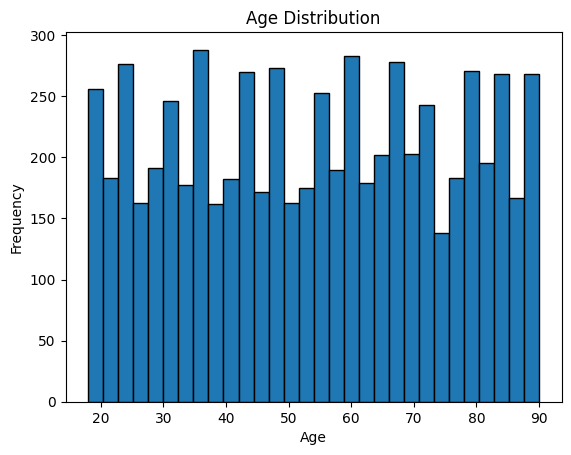

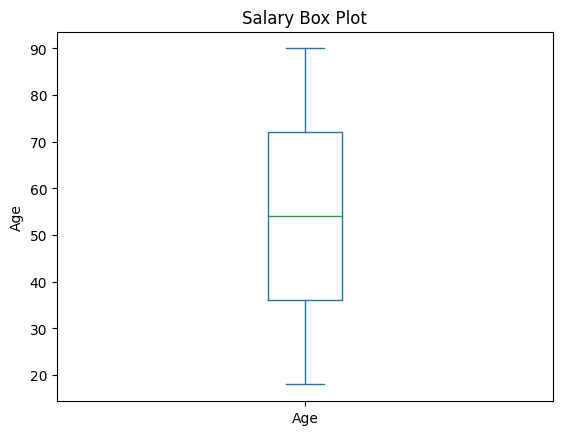

In [48]:
from matplotlib import pyplot as plt
# Visualize data
cleaned_df['Age'].dropna().plot(kind='hist', bins=30, edgecolor='black', title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

cleaned_df['Age'].dropna().plot(kind='box', title='Salary Box Plot')
plt.ylabel('Age')
plt.show()

No outliers detected.

In [49]:
#Imputing Age column with mean value of Age column
mean_age=cleaned_df['Age'].mean()
cleaned_df['Age']=cleaned_df['Age'].fillna(mean_age)

**Converting Age Column from float to int**

In [50]:
cleaned_df['Age']=cleaned_df['Age'].astype(int)
cleaned_df['Age']

,Age
0,61
2,27
3,74
4,84
5,43
...,...
8902,28
8904,86
8905,48
8906,48


In [51]:
cleaned_df.shape

(6838, 7)

**Handling Noise In Salary**

In [52]:
#Summary Statistics of Salary column
salary_summary = cleaned_df['Salary'].describe()
print(salary_summary)

count      6168.000000
mean      90221.555266
std       34788.080193
min       26233.921419
25%       60340.250000
50%       89912.500000
75%      119567.000000
max      176156.206747
Name: Salary, dtype: float64


In [53]:
cleaned_df['Salary'].unique()

array([139842.,  56616.,  62610., ...,  51202., 100996.,  58630.])

In [54]:
# Calculate skewness excluding NaN values
skewness = cleaned_df['Salary'].dropna().skew()
print("Skewness:", skewness)

# Interpret the skewness
if skewness > 1 or skewness < -1:
    print("The data is highly skewed.")
elif skewness > 0.5 or skewness < -0.5:
    print("The data is moderately skewed.")
else:
    print("The data is fairly symmetrical.")

Skewness: 0.029843952429005
The data is fairly symmetrical.


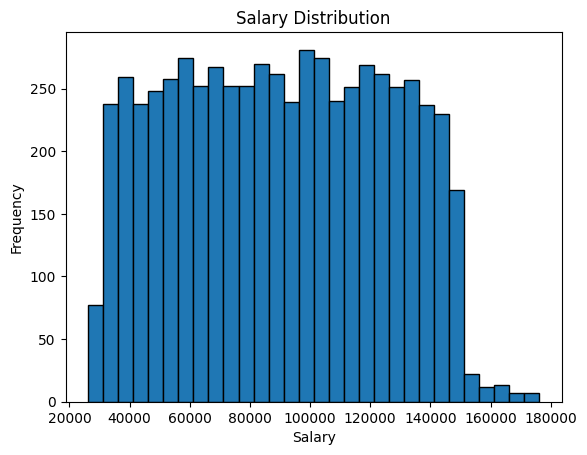

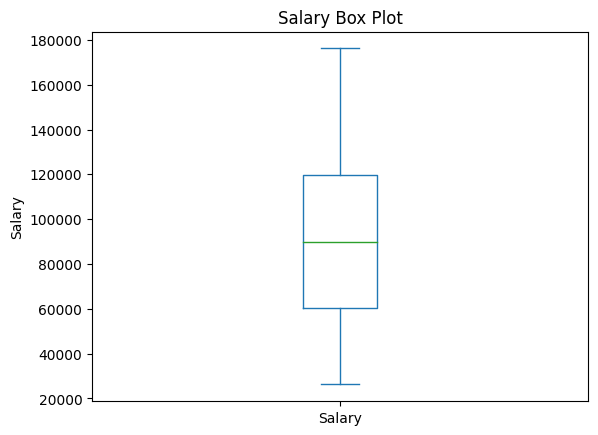

In [55]:
from matplotlib import pyplot as plt
# Visualize data
cleaned_df['Salary'].dropna().plot(kind='hist', bins=30, edgecolor='black', title='Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

cleaned_df['Salary'].dropna().plot(kind='box', title='Salary Box Plot')
plt.ylabel('Salary')
plt.show()

No outliers detected.

In [56]:
#Checking for Nan values in Salary Column
cleaned_df['Salary'].isna().sum()

670

In [57]:
#Checking for rows with nan values in salary column
nan_Salaryrows=cleaned_df[cleaned_df['Salary'].isna()]
nan_Salaryrows

,Id,Name,Age,Email,Join_Date,Salary,Department
14,0074dbd5-10d0-463f-9b10-d8473bea04ba,Unknown,22,ericjohnson@castillo-mendez.net,2023-01-03,NaN,HR
30,00e1d7d8-d158-4985-bbc0-77fd8260a94d,Sandra,81,shawnbrock@webb.biz,2024-12-05,NaN,HR
36,01123c97-f62a-417e-b7b7-5fa64f0f234a,Melissa,20,sierra96@hotmail.com,2021-07-09,NaN,Engineering
41,0136dc8c-a09d-42fa-9c73-63d384152a93,Jeffrey,34,adavid@calderon-church.org,1970-06-27,NaN,HR
54,01725d47-21ec-4a54-ada5-4459a53652ec,Emma,51,bmartinez@fletcher-barnes.net,2024-05-03,NaN,HR
...,...,...,...,...,...,...,...
8862,fef15973-ccb6-4b71-96c6-26ef9ecd8d49,Natalie,78,jeremy74@gmail.com,2021-02-17,NaN,Unknown
8864,ff00187c-d3e1-41d0-8062-e4574a267ac3,Toni,44,hrussell@pope.biz,2020-12-02,NaN,Support
8875,ff504dfa-b415-495a-a636-a0e9d3208415,Lisa,65,rmurphy@hotmail.com,2021-11-05,NaN,Support
8878,ff6b3f86-812b-4aa3-b4cc-36a1c81eb2a6,Rhonda,55,pruittcarl@turner.com,2011-02-11,NaN,Sales


IMPUTING NAN VALUES IN SALARY COLUMN BASED ON DEPARTMENT WISE MEDIAN SALARY

In [58]:
cleaned_df['Salary'].isna().sum()

670

In [59]:
# Calculate the median salary for each department
Median_depart_salary = cleaned_df.groupby('Department')['Salary'].median()

# Fill missing salaries with the department's median salary
cleaned_df['Salary'] = cleaned_df['Salary'].fillna(cleaned_df['Department'].map(Median_depart_salary))

# Display the cleaned DataFrame
cleaned_df.head()


,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin,61,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie,27,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia,74,mlewis@hotmail.com,1983-09-06,62610.0,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
5,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine,43,emily98@delgado.info,2022-04-04,73783.0,Unknown


In [60]:
#Dealing noise in Salary column

# Round the 'Salary' column to two decimal places
cleaned_df['Salary'] = cleaned_df['Salary'].round(2)


In [61]:
cleaned_df['Salary'].value_counts()

,count
Salary,
89687.02,138
90689.00,132
88431.00,125
91615.50,114
91130.00,102
...,...
69006.00,1
76276.00,1
174272.05,1


In [62]:
cleaned_df

,Id,Name,Age,Email,Join_Date,Salary,Department
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin,61,nancyortega@gmail.com,2021-10-19,139842.00,Engineering
2,000ea181-5552-4a36-b151-1d57483b5a31,Natalie,27,aliciawright@yahoo.com,2021-05-22,56616.00,Support
3,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia,74,mlewis@hotmail.com,1983-09-06,62610.00,HR
4,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84,gmedina@wilson-scott.com,2020-02-17,49203.00,HR
5,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine,43,emily98@delgado.info,2022-04-04,73783.00,Unknown
...,...,...,...,...,...,...,...
8902,ffe06285-05de-4899-aecc-c41c35546fc5,Victoria,28,cassandra78@hotmail.com,2022-02-09,95228.00,Support
8904,ffec6404-7edf-463d-8a61-909b38e9c185,Gina,86,joseph11@williams.com,2024-01-03,51202.00,Sales
8905,fff55723-981a-4646-b95c-1f33543e97d6,Jessica,48,hpope@gmail.com,2021-02-16,89687.02,Marketing
8906,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48,michael30@crane.com,1996-05-09,100996.00,Unknown


In [65]:
cleaned_df.isna().sum()

,0
Id,0
Name,0
Age,0
Email,0
Join_Date,0
Salary,0
Department,0


SAVING CLEANED DATASET

In [63]:
cleaned_df.to_csv('cleaned_dataset.csv', index=False)


CONCLUSIONS:

1)Handled Nan values and Duplicate Id's.

2)Only valid emails are retained and Email column containing Nan values are dropped.

3)Removed titles,Capital letters at the  end of the name,extra spaces,making names in Name column consistent.

4)All the valid dates are converted to a common format,invalid dates are treated as Nan,Nan values are filled using forward filling,followed by Backward filling.


5)Inconsistencies in the Department column is handled by defing a function.Nan values are filled with Unknown.

6)Nan values in Age column handled with mean of Age.

7)No outliers identified in Salary column,Nan values are replaced with department wise median salary.Noise in Salary column handled using round function.

